<a href="https://colab.research.google.com/github/nabxxmift23/submission/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nabila Miftakhurriza
- **Email:** M208D4KX2477@bangkit.academy
- **ID Dicoding:** M208D4KX2477

## Menentukan Pertanyaan Bisnis

- Bagaimana tren bulanan jumlah rental sepeda?
- Bagaimana korelasi antara jumlah rental sepeda dengan temperatur, kelembapan, dan kecepatan angin?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
url = 'https://raw.githubusercontent.com/nabxxmift23/submission/main/data/data%20bike_dicoding.csv'
df = pd.read_csv(url, sep=';')

### Assessing Data

In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
df.duplicated().sum()

0

## Cleaning Data

Data yang digunakan sudah cukup bersih, sehingga tidak diperlukan proses pembersihan.

## Exploratory Data Analysis (EDA)

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

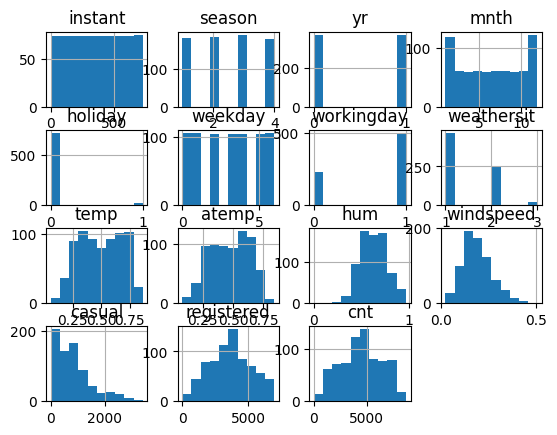

In [7]:
df.hist()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [9]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year
cnt_bulanan = df.groupby(['year', 'month'])['cnt'].sum().reset_index()

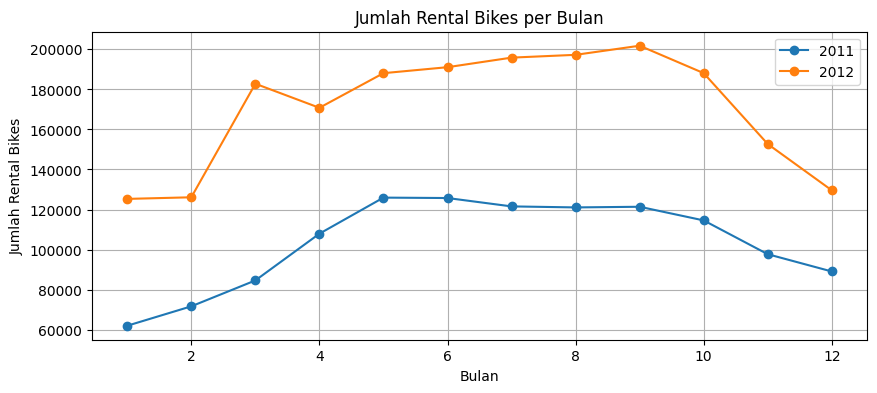

In [11]:
plt.figure(figsize=(10, 4))
for year in cnt_bulanan['year'].unique():
    plt.plot(cnt_bulanan[cnt_bulanan['year'] == year]['month'], cnt_bulanan[cnt_bulanan['year'] == year]['cnt'],
             marker='o', linestyle='-', label=str(year))

plt.title('Jumlah Rental Bikes per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental Bikes')
plt.grid(True)
plt.legend()
plt.show()

### Pertanyaan 2:

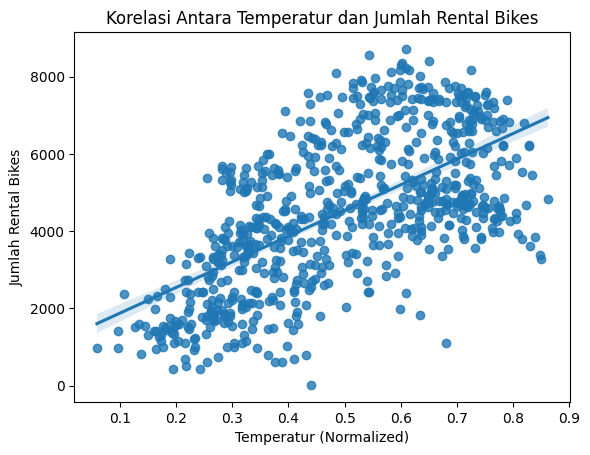

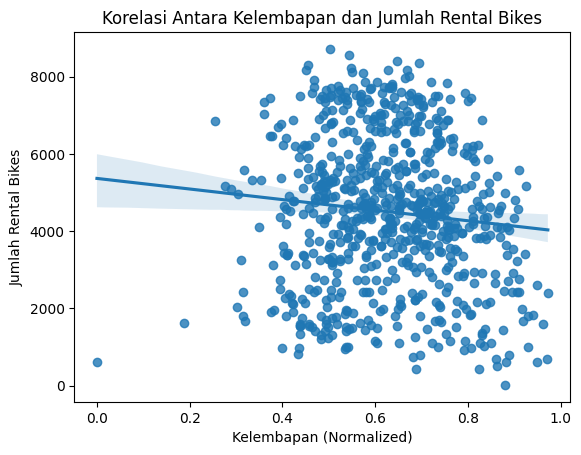

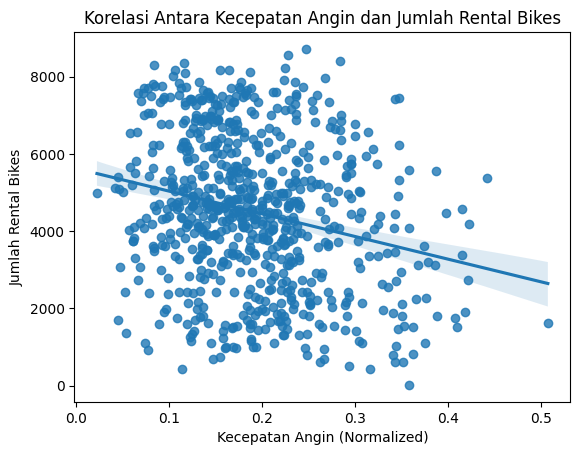

In [12]:
sns.regplot(x=df.temp, y=df.cnt)
plt.title('Korelasi Antara Temperatur dan Jumlah Rental Bikes')
plt.xlabel('Temperatur (Normalized)')
plt.ylabel('Jumlah Rental Bikes')
plt.show()

sns.regplot(x=df.hum, y=df.cnt)
plt.title('Korelasi Antara Kelembapan dan Jumlah Rental Bikes')
plt.xlabel('Kelembapan (Normalized)')
plt.ylabel('Jumlah Rental Bikes')
plt.show()

sns.regplot(x=df.windspeed, y=df.cnt)
plt.title('Korelasi Antara Kecepatan Angin dan Jumlah Rental Bikes')
plt.xlabel('Kecepatan Angin (Normalized)')
plt.ylabel('Jumlah Rental Bikes')
plt.show()

## Conclusion

- Jumlah peminjaman sepeda cenderung naik pada rentang bulan Maret sampai dengan bulan September. Oleh karena itu, pemegang usaha yang melakukan bisnis rental sepeda disarankan untuk melakukan rental sepeda pada rentang waktu tersebut.
- Temperatur dengan jumlah rental sepeda memiliki korelasi positif. Jika temperatur semakin tinggi, maka jumlah rental sepeda juga semakin banyak. Oleh karena itu, pemegang usaha bisa memperhatikan temperatur harian untuk menentukan waktu melakukan rental sepeda yang lebih baik, yaitu pada saat temperatur tinggi. Sementara itu, kelembapan dan kecepatan angin memiliki korelasi negatif dengan jumlah rental sepeda. Semakin tinggi kelembapan dan kecepatan angin, maka semakin sedikit jumlah rental sepeda. Oleh karena itu, pemegang usaha bisa memperhatikan kelembapan dan kecepatan angin harian untuk menentukan waktu melakukan rental sepeda yang lebih baik, yaitu pada saat kelembapan dan kecepatan angin harian rendah.